<a href="https://colab.research.google.com/github/MrsIgnis/MMO_tasks/blob/main/MMO_task_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **I. Предоработка данных**

In [23]:
! pip install pandas scikit-learn seaborn scipy

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Загрузка набора данных
try:
    df = pd.read_csv('/content/pokemon.csv')
except FileNotFoundError:
    df = pd.read_csv('pokemon.csv')

y = df['HP'] # выбираем целевую переменную (количественная)
df = df.drop('#', axis=1) # Удаляю столбец #, это индексы
df = df.drop('Name', axis=1) # Удаляю столбец Name
X = df.drop('HP', axis=1) # переменные для проверки влияния

In [25]:
X

,Type 1,Type 2,Total,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Grass,Poison,318,49,49,65,65,45,1,False
1,Grass,Poison,405,62,63,80,80,60,1,False
2,Grass,Poison,525,82,83,100,100,80,1,False
3,Grass,Poison,625,100,123,122,120,80,1,False
4,Fire,NaN,309,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...
795,Rock,Fairy,600,100,150,100,150,50,6,True
796,Rock,Fairy,700,160,110,160,110,110,6,True
797,Psychic,Ghost,600,110,60,150,130,70,6,True
798,Psychic,Dark,680,160,60,170,130,80,6,True


In [26]:
# Создаем копию данных
category_columns: list[str] = X.select_dtypes(include=['object']).columns # собираем колонки помеченные как object

# Применяем One-Hot Encoding к категориальным столбцам, исключая первую категорию (drop_first=True)
X = pd.get_dummies(X, columns=category_columns,drop_first=True)

In [27]:
X

,Total,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Type 1_Dark,Type 1_Dragon,...,Type 2_Ghost,Type 2_Grass,Type 2_Ground,Type 2_Ice,Type 2_Normal,Type 2_Poison,Type 2_Psychic,Type 2_Rock,Type 2_Steel,Type 2_Water
0,318,49,49,65,65,45,1,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1,405,62,63,80,80,60,1,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2,525,82,83,100,100,80,1,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,625,100,123,122,120,80,1,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,309,52,43,60,50,65,1,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,600,100,150,100,150,50,6,True,False,False,...,False,False,False,False,False,False,False,False,False,False
796,700,160,110,160,110,110,6,True,False,False,...,False,False,False,False,False,False,False,False,False,False
797,600,110,60,150,130,70,6,True,False,False,...,True,False,False,False,False,False,False,False,False,False
798,680,160,60,170,130,80,6,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [28]:
df_corr_test = X.copy()

# Добавляем целевую переменную в копию данных
df_corr_test['y'] = y
df_corr_test

,Total,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Type 1_Dark,Type 1_Dragon,...,Type 2_Grass,Type 2_Ground,Type 2_Ice,Type 2_Normal,Type 2_Poison,Type 2_Psychic,Type 2_Rock,Type 2_Steel,Type 2_Water,y
0,318,49,49,65,65,45,1,False,False,False,...,False,False,False,False,True,False,False,False,False,45
1,405,62,63,80,80,60,1,False,False,False,...,False,False,False,False,True,False,False,False,False,60
2,525,82,83,100,100,80,1,False,False,False,...,False,False,False,False,True,False,False,False,False,80
3,625,100,123,122,120,80,1,False,False,False,...,False,False,False,False,True,False,False,False,False,80
4,309,52,43,60,50,65,1,False,False,False,...,False,False,False,False,False,False,False,False,False,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,600,100,150,100,150,50,6,True,False,False,...,False,False,False,False,False,False,False,False,False,50
796,700,160,110,160,110,110,6,True,False,False,...,False,False,False,False,False,False,False,False,False,50
797,600,110,60,150,130,70,6,True,False,False,...,False,False,False,False,False,False,False,False,False,80
798,680,160,60,170,130,80,6,True,False,False,...,False,False,False,False,False,False,False,False,False,80


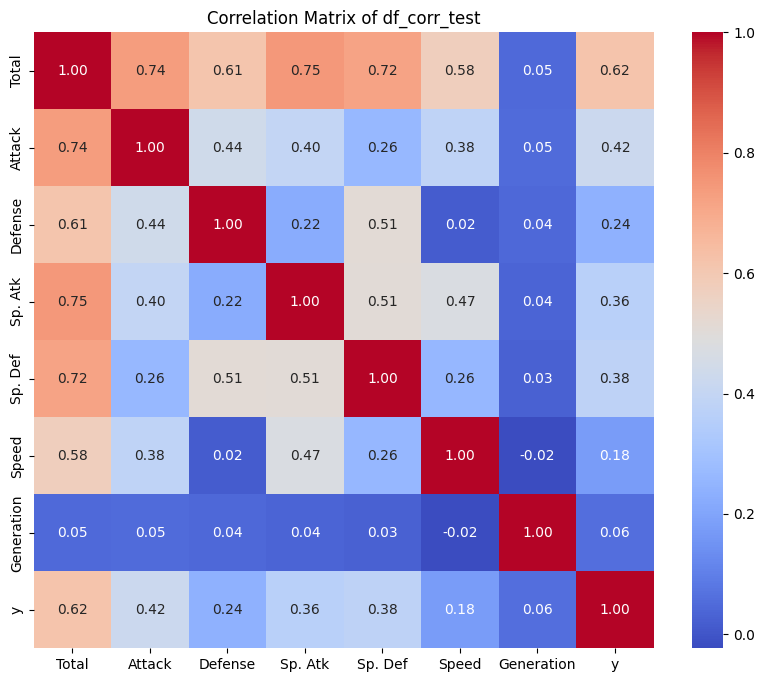

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Предположим, что у нас уже есть DataFrame под названием df_corr_test
# Выводим матрицу корреляции (только для числовых столбцов)
correlation_matrix = df_corr_test.select_dtypes(['int', 'float']).corr()

# Отображаем матрицу корреляции с помощью тепловой карты
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix of df_corr_test")
plt.show()

Анализ матрицы: наиболее значимый признак по ней - Total, а менее значимый - Generation (там практически мультиколлинеарность).

# **II. Разделение данных**

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def resolve_regression(X, y, regularization=None):
    """
    Выполняет регрессию с учетом регуляризации.

    Parameters:
    - X: Входные данные (признаки).
    - y: Целевые значения.
    - regularization: Тип регуляризации ('l1', 'l2', None). Если None, используется обычная линейная регрессия.
    """
    # Разделяем данные на обучающую (60%), валидационную (20%) и тестовую (20%) выборки
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
    X_validation, X_test, y_validation, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

    # Инициализация модели в зависимости от типа регуляризации
    if regularization == 'l1':
        model = Lasso()  # L1-регуляризация (Lasso)
    elif regularization == 'l2':
        model = Ridge()  # L2-регуляризация (Ridge)
    else:
        model = LinearRegression()  # Линейная регрессия без регуляризации

    # Обучение модели
    model.fit(X_train, y_train)

    # Предсказания на валидационной выборке
    y_valid_pred = model.predict(X_validation)

    # Вычисление метрик качества на валидационной выборке
    mae = mean_absolute_error(y_validation, y_valid_pred)
    mse = mean_squared_error(y_validation, y_valid_pred)
    r2 = r2_score(y_validation, y_valid_pred)

    # Вывод результатов
    print(f"Regularization: {regularization}")
    print(f"Mean Absolute Error (MAE) on validation: {mae:.2f}")
    print(f"Mean Squared Error (MSE) on validation: {mse:.2f}")
    print(f"R^2 Score on validation: {r2:.2f}")

    return model, X_train, X_validation, X_test, y_train, y_validation, y_test


In [31]:
resolve_regression(X, y)
None # Используем None (оператор ничего не делает) чтобы убрать вывод от return у функции resolve_regression. Пока он нам не нужен и и будет мешать

Regularization: None
Mean Absolute Error (MAE) on validation: 0.00
Mean Squared Error (MSE) on validation: 0.00
R^2 Score on validation: 1.00


Анализ: без каких-либо преобразований значения метрик очень странные. Либо валидационная выборка полностью совпала с обучающей, либо модель идеально (во что мало верится) запомнила закономерности распределения.

In [51]:
resolve_regression(X[['Total', 'Attack', 'Sp. Atk']], y)
None

Regularization: None
Mean Absolute Error (MAE) on validation: 13.83
Mean Squared Error (MSE) on validation: 402.31
R^2 Score on validation: 0.42


Анализ: выбрав уже определённые признаки (ориентировалась на тепловую карту), модель показала другие результаты.

1) Стоимость её ошибки чуть выше 10 единиц, не прям критично, но всё равно сильно;

2) Модель слишком много ошибается (Mean Squared Error (MSE) on validation: 402.31);

3) Ну и модель практически 50% данных может сама объяснить, а не просто угадать.

In [33]:
X

,Total,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Type 1_Dark,Type 1_Dragon,...,Type 2_Ghost,Type 2_Grass,Type 2_Ground,Type 2_Ice,Type 2_Normal,Type 2_Poison,Type 2_Psychic,Type 2_Rock,Type 2_Steel,Type 2_Water
0,318,49,49,65,65,45,1,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1,405,62,63,80,80,60,1,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2,525,82,83,100,100,80,1,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,625,100,123,122,120,80,1,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,309,52,43,60,50,65,1,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,600,100,150,100,150,50,6,True,False,False,...,False,False,False,False,False,False,False,False,False,False
796,700,160,110,160,110,110,6,True,False,False,...,False,False,False,False,False,False,False,False,False,False
797,600,110,60,150,130,70,6,True,False,False,...,True,False,False,False,False,False,False,False,False,False
798,680,160,60,170,130,80,6,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [34]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 42 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Total            800 non-null    int64
 1   Attack           800 non-null    int64
 2   Defense          800 non-null    int64
 3   Sp. Atk          800 non-null    int64
 4   Sp. Def          800 non-null    int64
 5   Speed            800 non-null    int64
 6   Generation       800 non-null    int64
 7   Legendary        800 non-null    bool 
 8   Type 1_Dark      800 non-null    bool 
 9   Type 1_Dragon    800 non-null    bool 
 10  Type 1_Electric  800 non-null    bool 
 11  Type 1_Fairy     800 non-null    bool 
 12  Type 1_Fighting  800 non-null    bool 
 13  Type 1_Fire      800 non-null    bool 
 14  Type 1_Flying    800 non-null    bool 
 15  Type 1_Ghost     800 non-null    bool 
 16  Type 1_Grass     800 non-null    bool 
 17  Type 1_Ground    800 non-null    bool 
 18  Type 1_Ice

# **III. Отборы признаков**

In [52]:
# Отбор признаков по корреляции

import pandas as pd
import numpy as np

def select_features_correlation(X, y, max_features=5):
    # Вычисляем корреляцию признаков с целевой переменной
    correlation = X.apply(lambda col: np.abs(col.corr(y)))

    # Отбираем top-N признаков с наибольшей корреляцией
    top_features = correlation.nlargest(max_features).index

    # Возвращаем X и y с отобранными признаками
    return X[top_features], y

In [53]:
# Отбор признаков с помощью RFE

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

def select_features_rfe(X, y, max_features=5):
    # Инициализация модели линейной регрессии
    model = LinearRegression()

    # RFE с указанным количеством признаков
    selector = RFE(model, n_features_to_select=max_features)
    selector = selector.fit(X, y)

    # Отбор признаков
    selected_features = X.columns[selector.support_]

    # Возвращаем X и y с отобранными признаками
    return X[selected_features], y

In [54]:
# Предположим, что у нас есть данные X и y
# Используем отбор на основе корреляции
X_selected_corr, y_selected_corr = select_features_correlation(X, y, max_features=5)

# Используем отбор с помощью RFE
X_selected_rfe, y_selected_rfe = select_features_rfe(X, y, max_features=5)

In [58]:
resolve_regression(X_selected_corr, y_selected_corr)
print(X_selected_corr.columns.tolist())
None

Regularization: None
Mean Absolute Error (MAE) on validation: 14.23
Mean Squared Error (MSE) on validation: 384.96
R^2 Score on validation: 0.45
['Total', 'Attack', 'Sp. Def', 'Sp. Atk', 'Legendary']


P. s. Анализ будет ниже после графика

In [59]:
resolve_regression(X_selected_rfe, y_selected_rfe)
print(X_selected_rfe.columns.tolist())
None

Regularization: None
Mean Absolute Error (MAE) on validation: 15.12
Mean Squared Error (MSE) on validation: 494.08
R^2 Score on validation: 0.29
['Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']


P. s. Анализ будет ниже после графика

Regularization: None
Mean Absolute Error (MAE) on validation: 15.12
Mean Squared Error (MSE) on validation: 494.08
R^2 Score on validation: 0.29


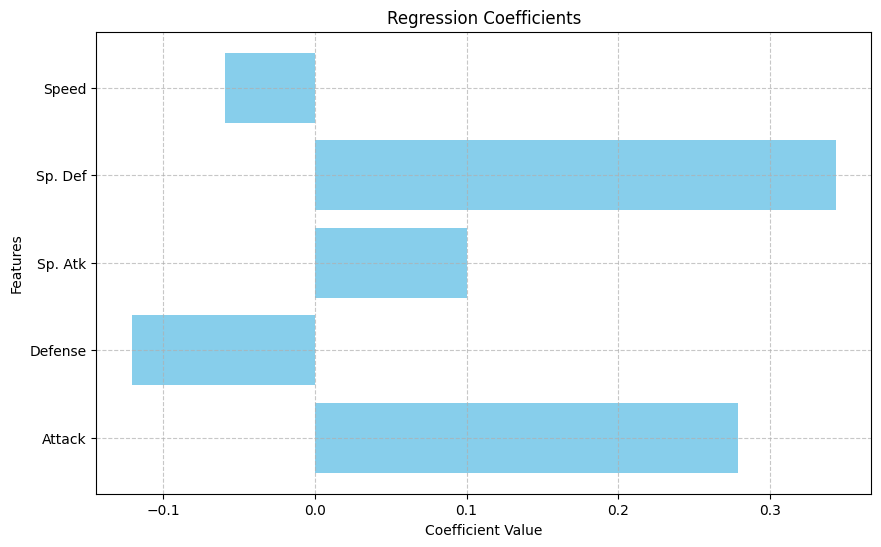

In [62]:
import matplotlib.pyplot as plt

def plot_regression_coefficients(model, feature_names):
    # Извлекаем коэффициенты регрессии
    coefficients = model.coef_

    # Создаем столбчатую диаграмму для визуализации коэффициентов
    plt.figure(figsize=(10, 6))
    plt.barh(feature_names, coefficients, color='skyblue')
    plt.xlabel("Coefficient Value")
    plt.ylabel("Features")
    plt.title("Regression Coefficients")
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

# Пример использования:
# Сначала выполним линейную регрессию
model, X_train, X_validation, X_test, y_train, y_validation, y_test = resolve_regression(X_selected_rfe, y_selected_rfe, None)

# Визуализация коэффициентов регрессии для отобранных признаков
plot_regression_coefficients(model, X_selected_rfe.columns)

Анализ:

1) Судя по графику, модель вообще не посчитала типы покемонов как значимые признаки;

2) Средняя абсолютная ошибка (MAE) on validation: 15.12 => в среднем, данная модель ошибается на этом датасете на столько единиц (честно, выглядит не очень, особенно когда в лекции показатель ниже 0.5);

3) Среднеквадратичная ошибка (MSE) on validation: 494.08 => данная модель на данном датасете очень сильно ошибалась, потому что данные сильно были разбросаны от среднего (особенно в сравнении с тем, что в лекции этот показатель не превысил 1);

4) Коэффициент детерминации R^2 Score on validation: 0.29 => к сожалению, данная модель даже половины данных не объяснила, что говорит о её низкой точности на данный момент времени.

Regularization: None
Mean Absolute Error (MAE) on validation: 14.23
Mean Squared Error (MSE) on validation: 384.96
R^2 Score on validation: 0.45


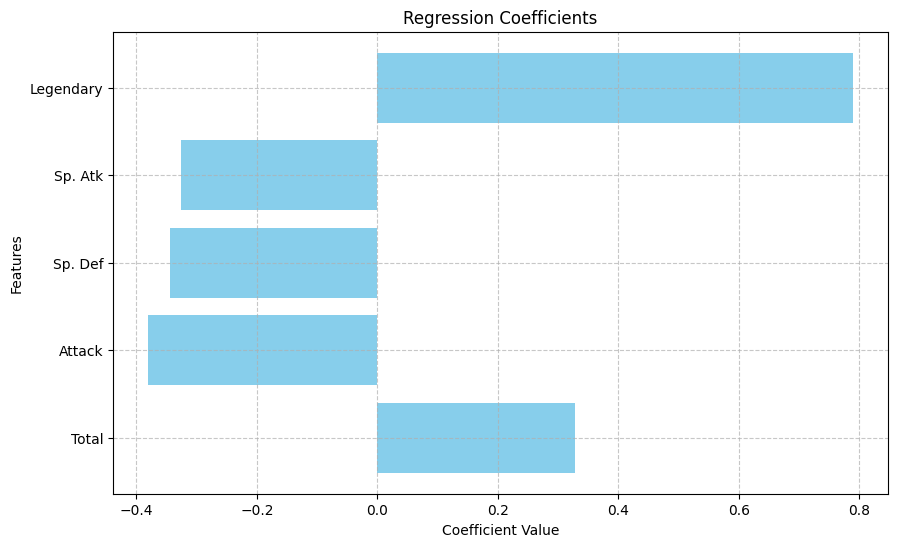

In [63]:
import matplotlib.pyplot as plt

def plot_regression_coefficients(model, feature_names):
    # Извлекаем коэффициенты регрессии
    coefficients = model.coef_

    # Создаем столбчатую диаграмму для визуализации коэффициентов
    plt.figure(figsize=(10, 6))
    plt.barh(feature_names, coefficients, color='skyblue')
    plt.xlabel("Coefficient Value")
    plt.ylabel("Features")
    plt.title("Regression Coefficients")
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

# Пример использования:
# Сначала выполним линейную регрессию
model, X_train, X_validation, X_test, y_train, y_validation, y_test = resolve_regression(X_selected_corr, y_selected_corr, None)

# Визуализация коэффициентов регрессии для отобранных признаков
plot_regression_coefficients(model, X_selected_corr.columns)

Анализ:

1) Судя по графику, модель и здесь не посчитала типы покемонов как значимые признаки;

2) Средняя абсолютная ошибка (MAE) on validation: 14.23 => т. е. по корреляции стоимость ошибки модели будет чуть меньше, чем у предыдущей, но всё равно довольно высокая;

3) Среднеквадратичная ошибка (MSE) on validation: 384.96 => данный отбор признаков гораздо меньше совершал ошибки, чем RFE (на 100 единиц меньше значение), но всё равно этот показатель довольно высоким и критичным остался;

4) Коэффициент детерминации R^2 Score on validation: 0.45 => в этом случае модель практически 50% данных смогла объяснить, что говорит о явном преимуществе корреляции в сравнении с RFE (ну и если брать признаки, то Legendary имеет большую значимости, чем Speed в предыдущем отборе). Значит для этого датасета подходит больше эта модель.

In [41]:
# Преобразуем все столбцы типа int в float
X_selected_rfe = X_selected_rfe.astype({col: 'float64' for col in X_selected_rfe.select_dtypes(include=['int64']).columns})

# Выбираем числовые признаки
numeric_features = X_selected_rfe.select_dtypes(include=['float64']).columns.tolist()

# Инициализируем scaler
scaler = MinMaxScaler()

# Применяем нормализацию
X_selected_rfe[numeric_features] = scaler.fit_transform(X_selected_rfe[numeric_features])

In [42]:
X_selected_rfe

,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,0.237838,0.195556,0.298913,0.214286,0.228571
1,0.308108,0.257778,0.380435,0.285714,0.314286
2,0.416216,0.346667,0.489130,0.380952,0.428571
3,0.513514,0.524444,0.608696,0.476190,0.428571
4,0.254054,0.168889,0.271739,0.142857,0.342857
...,...,...,...,...,...
795,0.513514,0.644444,0.489130,0.619048,0.257143
796,0.837838,0.466667,0.815217,0.428571,0.600000
797,0.567568,0.244444,0.760870,0.523810,0.371429
798,0.837838,0.244444,0.869565,0.523810,0.428571


Regularization: None
Mean Absolute Error (MAE) on validation: 15.12
Mean Squared Error (MSE) on validation: 494.08
R^2 Score on validation: 0.29


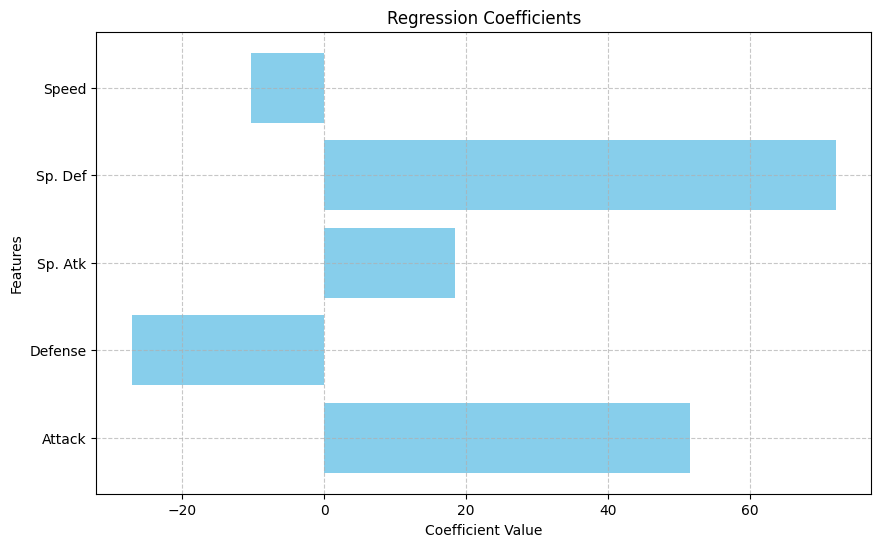

In [44]:
# Сначала выполним линейную регрессию с учетом разделения на обучающую, валидационную и тестовую выборки
model, X_train, X_validation, X_test, y_train, y_validation, y_test = resolve_regression(X_selected_rfe, y_selected_rfe, None)

# Визуализация коэффициентов регрессии
plot_regression_coefficients(model, X_selected_rfe.columns)

Анализ: даже после преобразования числовых данных результат такой же, как и у модели с RFE.

In [45]:
# Предсказание на валидационной выборке
y_valid_pred = model.predict(X_validation)

# Вычисление метрик качества
mae = mean_absolute_error(y_validation, y_valid_pred)
mse = mean_squared_error(y_validation, y_valid_pred)
r2 = r2_score(y_validation, y_valid_pred)

# Вывод метрик
print(f"Mean Absolute Error (MAE) on validation: {mae:.2f}")
print(f"Mean Squared Error (MSE) on validation: {mse:.2f}")
print(f"R^2 Score on validation: {r2:.2f}")

Mean Absolute Error (MAE) on validation: 15.12
Mean Squared Error (MSE) on validation: 494.08
R^2 Score on validation: 0.29


Анализ: результат такой же, как и у модели с RFE.

# **IV. Регуляризация**

In [46]:
X

,Total,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Type 1_Dark,Type 1_Dragon,...,Type 2_Ghost,Type 2_Grass,Type 2_Ground,Type 2_Ice,Type 2_Normal,Type 2_Poison,Type 2_Psychic,Type 2_Rock,Type 2_Steel,Type 2_Water
0,318,49,49,65,65,45,1,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1,405,62,63,80,80,60,1,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2,525,82,83,100,100,80,1,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,625,100,123,122,120,80,1,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,309,52,43,60,50,65,1,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,600,100,150,100,150,50,6,True,False,False,...,False,False,False,False,False,False,False,False,False,False
796,700,160,110,160,110,110,6,True,False,False,...,False,False,False,False,False,False,False,False,False,False
797,600,110,60,150,130,70,6,True,False,False,...,True,False,False,False,False,False,False,False,False,False
798,680,160,60,170,130,80,6,True,False,False,...,False,False,False,False,False,False,False,False,False,False


Regularization: l1
Mean Absolute Error (MAE) on validation: 0.21
Mean Squared Error (MSE) on validation: 0.10
R^2 Score on validation: 1.00


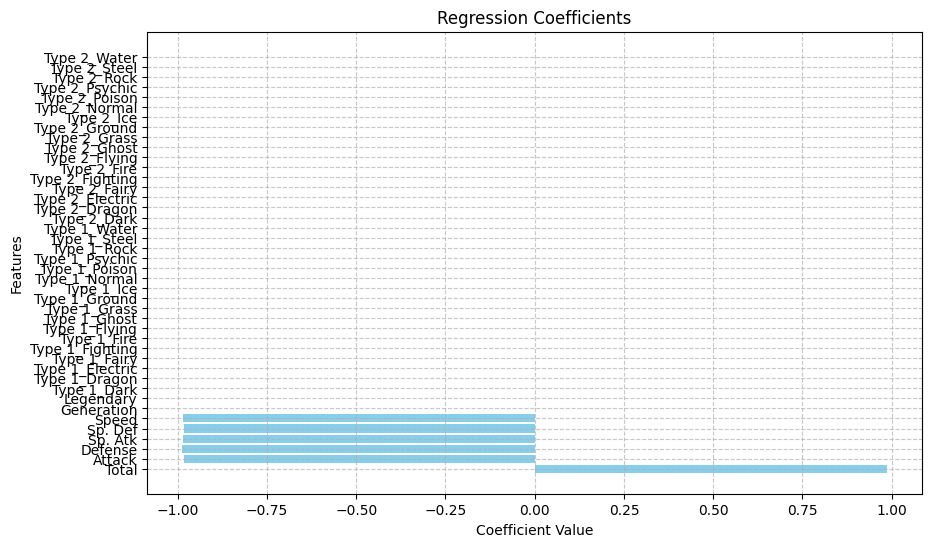

In [47]:
# L1-регуляризация
model, _, _, _, _ , _ , _  = resolve_regression(X, y, regularization='l1')
None

# Визуализация коэффициентов регрессии
plot_regression_coefficients(model, X.columns)

Анализ: вот сейчас результат прям гораздо лучше.

1) Стоимость ошибки значительно уменьшилась, что говорит о повышении эффектиности модели;

2) Модель в принципе стала меньше (прям в 400 раз) ошибаться из-за штрафов к слишком большим признакам;

3) Ну и коэффициент детерминации прям 100% показывает, что все данные приближены максимально к среднему и модель идеальная (хотя иногда это не есть хорошо).

Regularization: l2
Mean Absolute Error (MAE) on validation: 0.00
Mean Squared Error (MSE) on validation: 0.00
R^2 Score on validation: 1.00


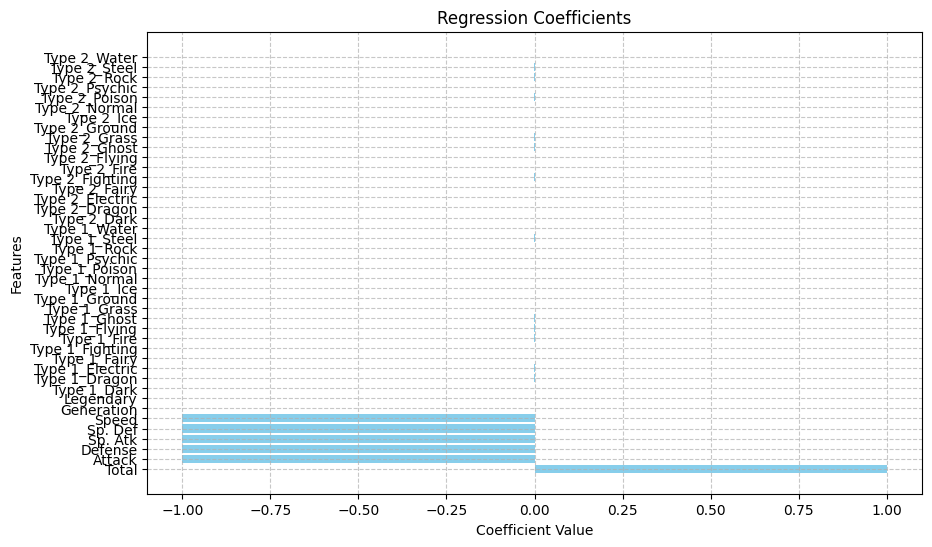

In [48]:
# L2-регуляризация
model, _, _, _, _ , _ , _ = resolve_regression(X, y, regularization='l2')
None

# Визуализация коэффициентов регрессии
plot_regression_coefficients(model, X.columns)

Анализ: L-2 регуляризация вернула такой же результат, как и без преобразования данных. Т. е. ни ошибок, ни отклонений, но говорит о том, что модель просто зазубрила данные, а не поняла, по какому принципу они распределяются.

Regularization: None
Mean Absolute Error (MAE) on validation: 0.00
Mean Squared Error (MSE) on validation: 0.00
R^2 Score on validation: 1.00


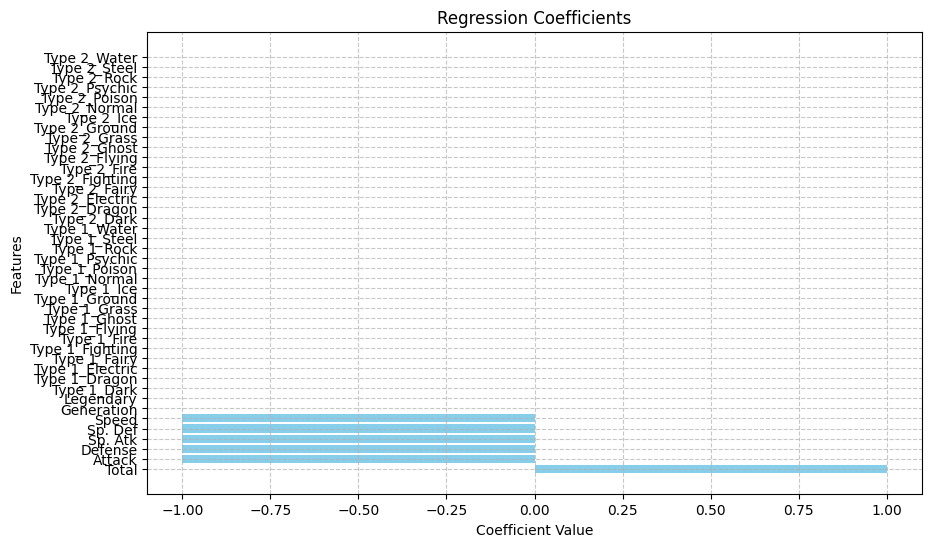

In [49]:
# Без регуляризации
model, _, _, _, _ , _ , _  = resolve_regression(X, y, regularization=None)
None

# Визуализация коэффициентов регрессии
plot_regression_coefficients(model, X.columns)

Анализ: аналогичная ситуация, как и с L-2.